In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pickle
import os
import six.moves.urllib as urllib
import sys
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
sys.path.append("..")
from utils import label_map_util
from utils import visualization_utils as vis_util

In [9]:
# What model to download.
MODEL_NAME = 'unaugmented1'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('training', 'object-detection.pbtxt')

NUM_CLASSES = 90
#Load graph
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

#Load Label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

#Helper code
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

## Edit Code Below

In [10]:
testcsv = pd.read_csv('test.csv')
testcsv = testcsv.sort_values(by=['filename'])
testcsv = testcsv.reset_index(drop=True)

In [11]:
testcsv

,filename,width,height,class,xmin,ymin,xmax,ymax
0,261Red brocket deer Mazana americana.185.jpg,1280,720,Red brocket deer,382,107,881.0,680.0
1,261Red brocket deer Mazana americana.290.jpg,1280,720,Red brocket deer,149,44,719.0,681.0
2,261Red brocket deer Mazana americana.35.jpg,1280,720,Red brocket deer,669,206,900.0,551.0
3,261Red brocket deer Mazana americana.60.jpg,1280,720,Red brocket deer,669,187,896.0,567.0
4,264Razor Billed Curassow Mitu tuberoso.10.jpg,1280,720,Razor Billed Curassow,830,428,934.0,525.0
5,264Razor Billed Curassow Mitu tuberoso.1025.jpg,1280,720,Razor Billed Curassow,739,403,1024.0,571.0
6,264Razor Billed Curassow Mitu tuberoso.1045.jpg,1280,720,Razor Billed Curassow,774,422,1060.0,569.0
7,264Razor Billed Curassow Mitu tuberoso.1065.jpg,1280,720,Razor Billed Curassow,782,423,1073.0,567.0
8,264Razor Billed Curassow Mitu tuberoso.1180.jpg,1280,720,Razor Billed Curassow,772,428,1065.0,567.0
9,264Razor Billed Curassow Mitu tuberoso.160.jpg,1280,720,Razor Billed Curassow,766,420,933.0,540.0


In [6]:
n = 2 #1860
# normalize values between 0 and 1 to match the output of the model. Change these based on the height and width of the csv. 
x, y = testcsv['width'][n], testcsv['height'][n]
boxdims = [testcsv['xmin'][n]/x,testcsv['ymin'][n]/y,testcsv['xmax'][n]/x,testcsv['ymax'][n]/y] 

In [7]:
print('ymin', boxdims[1])
print('xmin', boxdims[0])
print('ymax', boxdims[3])
print('xmax', boxdims[2])
                        
'''ymin 0.2595888376235962
xmin 0.5391280055046082
ymax 0.7544671893119812
xmax 0.7277224659919739
'''

ymin 0.2861111111111111
xmin 0.52265625
ymax 0.7652777777777777
xmax 0.703125


'ymin 0.2595888376235962\nxmin 0.5391280055046082\nymax 0.7544671893119812\nxmax 0.7277224659919739\n'

In [12]:
images = os.listdir('Test')

In [13]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'Test'

In [10]:
images

['261Red brocket  deer   Mazana americana.185.jpg',
 '261Red brocket  deer   Mazana americana.290.jpg',
 '261Red brocket  deer   Mazana americana.35.jpg',
 '261Red brocket  deer   Mazana americana.60.jpg',
 '264Razor Billed Curassow Mitu tuberoso.10.jpg',
 '264Razor Billed Curassow Mitu tuberoso.1025.jpg',
 '264Razor Billed Curassow Mitu tuberoso.1045.jpg',
 '264Razor Billed Curassow Mitu tuberoso.1065.jpg',
 '264Razor Billed Curassow Mitu tuberoso.1180.jpg',
 '264Razor Billed Curassow Mitu tuberoso.160.jpg',
 '264Razor Billed Curassow Mitu tuberoso.165.jpg',
 '264Razor Billed Curassow Mitu tuberoso.280.jpg',
 '264Razor Billed Curassow Mitu tuberoso.430.jpg',
 '264Razor Billed Curassow Mitu tuberoso.450.jpg',
 '264Razor Billed Curassow Mitu tuberoso.465.jpg',
 '264Razor Billed Curassow Mitu tuberoso.490.jpg',
 '264Razor Billed Curassow Mitu tuberoso.510.jpg',
 '264Razor Billed Curassow Mitu tuberoso.545.jpg',
 '264Razor Billed Curassow Mitu tuberoso.585.jpg',
 '264Razor Billed Curassow

In [14]:
predict = {'filename':[],
           'npreds': [],
           'class': [],
           'score': [],
           'xmin': [],
           'ymin': [],
           'xmax': [],
           'ymax': []}

In [15]:
predict.to_csv('predict.csv', index = False)

AttributeError: 'dict' object has no attribute 'to_csv'

In [162]:
temp = pd.read_csv('predict.csv')
eval(temp['filename'][0])

2

In [16]:
min_score_thresh = 0.5
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for k, filename in enumerate(images):
            image_path = os.path.join(PATH_TO_TEST_IMAGES_DIR, filename)
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            print ('predicting', k)
            (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            
            #getting data from prediction
            xmins, ymins, xmaxs, ymaxs, classlist = [], [], [], [], []
            npreds = len(scores[scores>min_score_thresh])
            classes = np.squeeze(classes)[:npreds].astype(np.int32)
            boxes = np.squeeze(boxes)[:npreds]
            for i in range(npreds):
                classlist.append(category_index[classes[i]]['name'])
                xmins.append(boxes[i][1]) #outputs from sess.run return x,y values in different order than test.csv
                ymins.append(boxes[i][0])
                xmaxs.append(boxes[i][3])
                ymaxs.append(boxes[i][2])
            predict['filename'].append(filename)
            predict['npreds'].append(npreds)
            predict['class'].append(classes)
            predict['score'].append(np.squeeze(scores)[:npreds])
            predict['xmin'].append(xmins)
            predict['ymin'].append(ymins)
            predict['xmax'].append(xmaxs)
            predict['ymax'].append(ymaxs)

predicting 0
predicting 1
predicting 2
predicting 3
predicting 4
predicting 5
predicting 6
predicting 7
predicting 8
predicting 9
predicting 10
predicting 11
predicting 12
predicting 13
predicting 14
predicting 15
predicting 16
predicting 17
predicting 18
predicting 19
predicting 20
predicting 21
predicting 22
predicting 23
predicting 24
predicting 25
predicting 26
predicting 27


KeyboardInterrupt: 

In [54]:
b =images

In [55]:
a = testcsv['filename'].to_list()

In [132]:
dups = []
gays = []
for i, each in enumerate(a):
    if each not in dups:
        dups.append(each)
    else:
        gays.append([each, i])

In [72]:
print (a[70], b[70]) 

280Paca   Agouti paca.350.jpg 280Paca   Agouti paca.350.jpg


In [77]:
pickle.dump( predict, open( "predict.p", "wb" ) ) 

In [83]:
pd.DataFrame(data = {'filename': images}).to_csv('wtf2.csv')

In [92]:
len(dups)

3052

In [107]:
for i, v in enumerate(predict['filename']):
    if v == '280Paca   Agouti paca.350.jpg':
        print (i)

70


In [114]:
for k, v in enumerate(predict['filename']):
    

0
1
2
3
4
5
6
7


In [207]:
predict_byimage = {}
for k, v in enumerate(predict['filename']):
    predict_byimage[v] = {'npreds': predict['npreds'][k],
            'class':predict['class'][k],
           #'class': category_index[predict['class'][k][0]]['name'] if (len(predict['class'][k])!=0) else [] ,
           'score': predict['score'][k],
           'xmin': predict['xmin'][k],
           'ymin': predict['ymin'][k],
           'xmax': predict['xmax'][k],
           'ymax': predict['ymax'][k]}

In [201]:
len([])

0

In [120]:
g = predict_byimage['280Paca   Agouti paca.350.jpg']
print ('xmin', g['xmin'][0]*1200)
print ('ymin', g['ymin'][0]*720)
print ('xmax', g['xmax'][0]*1200)
print ('ymax', g['ymax'][0]*720)

xmin 380.0380825996399
ymin 372.63131618499756
xmax 559.516704082489
ymax 459.03754234313965


In [125]:
pickle.dump(predict_byimage, open("predictlookup.p", "wb"))

In [94]:
truedict= {}
for each in testcsv['filename']:
    truedict[each] = {
        'npreds': 0,
        'class': [],
        'xmin':[],
        'ymin':[],
        'xmax':[],
        'ymax':[]
    }
for i, each in enumerate(testcsv['filename']):
    truedict[each]['npreds'] += 1
    truedict[each]['class'].append(testcsv.at[i, 'class'])
    truedict[each]['xmin'].append(testcsv.at[i, 'xmin']/testcsv.at[i, 'width'])
    truedict[each]['ymin'].append(testcsv.at[i, 'ymin']/testcsv.at[i, 'height'])
    truedict[each]['xmax'].append(testcsv.at[i, 'xmax']/testcsv.at[i, 'width'])
    truedict[each]['ymax'].append(testcsv.at[i, 'ymax']/testcsv.at[i, 'height'])

In [170]:
testcsv.to_csv('sorted_test.csv')

In [174]:
truedict['280Paca   Agouti paca.350.jpg']

{'class': ['Paca', 'Paca'],
 'npreds': 2,
 'xmax': [0.3859375, 0.475],
 'xmin': [0.30546875, 0.38203125],
 'ymax': [0.6513888888888889, 0.6222222222222222],
 'ymin': [0.5069444444444444, 0.5208333333333334]}

In [177]:
pickle.dump(truedict, open('truedict.p', 'wb'))

In [ ]:
truedict_csv()

In [175]:
pd.DataFrame(data = truedict).to_csv('truedict.csv')

# Now that I have the `truedict` and the `predict_byimage` i can start to evaluate the model!!!!!!

In [23]:
predict_byimage = pickle.load(open('predictlookup.p', 'rb'))
truedict = pickle.load(open('truedict.p', 'rb'))

In [209]:
if (truedict['261Red brocket  deer   Mazana americana.185.jpg']['class'][0] == category_index[predict_byimage['261Red brocket  deer   Mazana americana.185.jpg']['class'][0]]['name']):
    print ('yes')

yes


In [208]:
predict_byimage['261Red brocket  deer   Mazana americana.185.jpg']['class'][0]

22

In [149]:
truecsv = pd.read_csv('truedict.csv')#.drop('Unnamed: 0', axis = 1)
predict = pd.read_csv('predict.csv').drop('Unnamed: 0', axis = 1)

In [26]:
#tp, tn, fp, fn
correct = 0
total = 0
for k, v in predict_byimage.items():
    if (len(predict_byimage[k]['class']) == len(truedict[k]['class'])):
        for i in range(len(predict_byimage[k]['class'])):
            if category_index[predict_byimage[k]['class'][i]]['name'] in truedict[k]['class']:
                correct += 1
    else:
        mini= min(len(predict_byimage[k]['class']), len(truedict[k]['class']))
        maxi = max(len(predict_byimage[k]['class']), len(truedict[k]['class']))
        total += maxi - mini
        for i in range(mini):
            if category_index[predict_byimage[k]['class'][i]]['name'] in truedict[k]['class']:
                correct += 1
# order shouldn't matter. 
'''
print ('tp', tp)
print ('tf', tf)
print ('fp', fp)
print ('fn', fn)
'''

"\nprint ('tp', tp)\nprint ('tf', tf)\nprint ('fp', fp)\nprint ('fn', fn)\n"

In [150]:
unified_data = predict
unified_data['truenpreds'] = 0
unified_data['trueclass'] = ''
unified_data['truexmin'] = None
unified_data['trueymin'] = None
unified_data['truexmax'] = None
unified_data['trueymax'] = None

In [151]:
for i, each in enumerate(unified_data['filename']):
    if unified_data.at[i, 'class'] == []:
        unified_data.at[i, 'class'] = None
    else:
        unified_data.at[i, 'class'] = eval(unified_data.at[i, 'class'])
        for j in range(len(unified_data.at[i, 'class'])):
            unified_data.at[i, 'class'][j] = category_index[unified_data.at[i, 'class'][j]]['name']
    unified_data.at[i, 'truenpreds'] = truedict[each]['npreds']
    unified_data.at[i, 'trueclass'] = truedict[each]['class']
    unified_data.at[i, 'truexmin'] = truedict[each]['xmin']
    unified_data.at[i, 'trueymin'] = truedict[each]['ymin']
    unified_data.at[i, 'truexmax'] = truedict[each]['xmax']
    unified_data.at[i, 'trueymax'] = truedict[each]['ymax']

In [166]:
unified_data

,filename,npreds,class,score,xmin,ymin,xmax,ymax,truenpreds,trueclass,truexmin,trueymin,truexmax,trueymax
0,261Red brocket deer Mazana americana.185.jpg,1,[Red brocket deer],[0.9918568],[0.2919929],[0.15612891],[0.703599],[0.865424],1,[Red brocket deer],[0.2984375],[0.1486111111111111],[0.68828125],[0.9444444444444444]
1,261Red brocket deer Mazana americana.290.jpg,1,[Red brocket deer],[0.959582],[0.115241155],[0.055744886],[0.5627221],[0.8737274],1,[Red brocket deer],[0.11640625],[0.06111111111111111],[0.56171875],[0.9458333333333333]
2,261Red brocket deer Mazana americana.35.jpg,1,[Red brocket deer],[0.9913311],[0.53912836],[0.25958863],[0.72772294],[0.7544673],1,[Red brocket deer],[0.52265625],[0.2861111111111111],[0.703125],[0.7652777777777777]
3,261Red brocket deer Mazana americana.60.jpg,1,[Red brocket deer],[0.9956103],[0.54848015],[0.22945417],[0.70815027],[0.801745],1,[Red brocket deer],[0.52265625],[0.25972222222222224],[0.7],[0.7875]
4,264Razor Billed Curassow Mitu tuberoso.10.jpg,1,[Razor Billed Curassow],[0.9061576],[0.6557013],[0.59241897],[0.73604834],[0.7291177],1,[Razor Billed Curassow],[0.6484375],[0.5944444444444444],[0.7296875],[0.7291666666666666]
5,264Razor Billed Curassow Mitu tuberoso.1025.jpg,1,[Razor Billed Curassow],[0.9944149],[0.5824562],[0.5580658],[0.81855816],[0.7820325],1,[Razor Billed Curassow],[0.57734375],[0.5597222222222222],[0.8],[0.7930555555555555]
6,264Razor Billed Curassow Mitu tuberoso.1045.jpg,1,[Razor Billed Curassow],[0.9950858],[0.6086255],[0.5817753],[0.8312401],[0.7821164],1,[Razor Billed Curassow],[0.6046875],[0.5861111111111111],[0.828125],[0.7902777777777777]
7,264Razor Billed Curassow Mitu tuberoso.1065.jpg,1,[Razor Billed Curassow],[0.9932463],[0.61191475],[0.57827836],[0.82536757],[0.7752517],1,[Razor Billed Curassow],[0.6109375],[0.5875],[0.83828125],[0.7875]
8,264Razor Billed Curassow Mitu tuberoso.1180.jpg,1,[Razor Billed Curassow],[0.9934609],[0.6123857],[0.58588725],[0.82892054],[0.7792698],1,[Razor Billed Curassow],[0.603125],[0.5944444444444444],[0.83203125],[0.7875]
9,264Razor Billed Curassow Mitu tuberoso.160.jpg,1,[Razor Billed Curassow],[0.989042],[0.60604167],[0.57182455],[0.7269089],[0.7295955],1,[Razor Billed Curassow],[0.5984375],[0.5833333333333334],[0.72890625],[0.75]


In [194]:
ypreds = []
for i, each in enumerate(unified_data['filename']):
    if unified_data.at[i, 'truenpreds'] > unified_data.at[i, 'npreds']:
        if unified_data.at[i, 'npreds'] != 0:
            for j in range(unified_data.at[i, 'npreds']):
                ypreds.append(unified_data.at[i, 'class'][j])
        for j in range(unified_data.at[i, 'truenpreds']-unified_data.at[i, 'npreds']):
            ypreds.append('None')
    else:
        for j in range(unified_data.at[i, 'truenpreds']):
            ypreds.append(unified_data.at[i, 'class'][j])


In [195]:
ytrue = []
for i, each in enumerate(unified_data['trueclass']):
    if len(each) > 1:
        for j in range(len(each)):
            ytrue.append(each[j])
    else:
        ytrue.append(each[0])

In [213]:
print (len(ytrue) ,len(ypreds))

3103 3103


In [212]:
for k, v in category_index.items():
    ytrue.append(v['name'])
    ypreds.append(v['name'])

In [219]:
ytrue = pd.Series(ytrue, name = 'Actual')
ypreds = pd.Series(ypreds, name = 'Predicted')
df_confusion = pd.crosstab(ytrue, ypreds, rownames=['Actual'], colnames=['Predicted'])


In [241]:
for index, row in df_confusion.iterrows():
    if row.name == index:
        df_confusion.at[row.name, index] -= 1

In [215]:
distinctpreds = []
for each in ypreds:
    if each not in distinctpreds:
        distinctpreds.append(each)

In [247]:
df_confusion['Tapir']

Actual
Acouchy                  0
Agouti                   0
Bat                      0
Black caiman             0
Crab-eating Raccoon      0
Deer                     0
Giant anteater           0
Hawk                     0
Heron                    0
Jaguar                   0
Lizard                   0
Monkey                   0
Muscovy Duck             0
Nine banded armadillo    0
Ocelot                   0
Opossum                  0
Otter                    0
Paca                     0
Peccary                  0
Puma                     0
Razor Billed Curassow    0
Red brocket deer         0
South american coati     0
Spiny rat                0
Spixs guan               0
Squirrel                 0
Sunbittern               0
Tamandua                 0
Tapir                    0
Tinamou                  0
Toucan                   0
Tyra                     0
Name: Tapir, dtype: int64

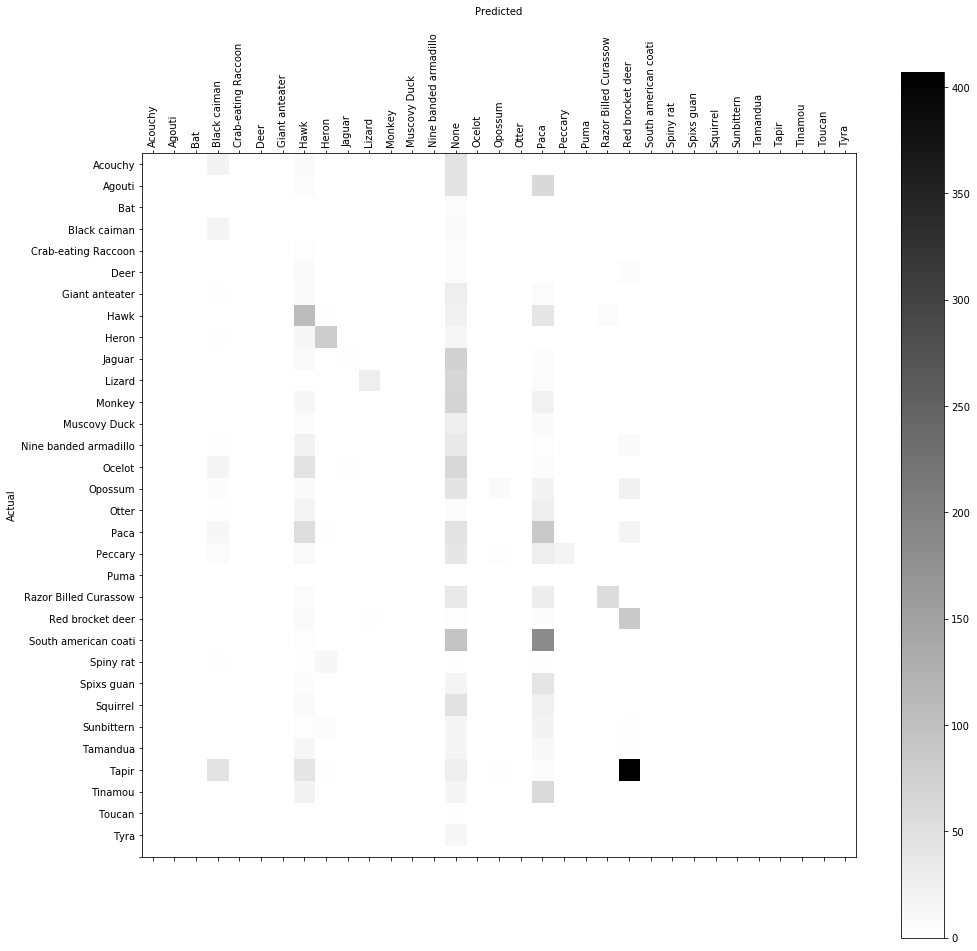

In [263]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=90)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name, labelpad = -850)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 100
    fig_size[1] = 150
    plt.rcParams["figure.figsize"] = fig_size
plot_confusion_matrix(df_confusion)


In [4]:
df_confusion = pickle.load(open('dfconfusion.p', 'rb'))

In [16]:
df_confusion

Predicted,Acouchy,Agouti,Bat,Black caiman,Crab-eating Raccoon,Deer,Giant anteater,Hawk,Heron,Jaguar,...,South american coati,Spiny rat,Spixs guan,Squirrel,Sunbittern,Tamandua,Tapir,Tinamou,Toucan,Tyra
Actual,,,,,,,,,,,,,,,,,,,,,
Acouchy,0,0,0,20,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
Agouti,0,0,0,1,0,0,0,7,1,0,...,0,0,0,0,0,0,0,0,0,0
Bat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Black caiman,0,0,0,18,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Crab-eating Raccoon,0,0,0,1,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
Deer,0,0,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
Giant anteater,0,0,0,2,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
Hawk,0,0,0,1,0,0,0,107,2,0,...,0,0,0,0,0,0,0,0,0,0
Heron,0,0,0,2,0,0,0,14,81,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
accuracy = np.sum(np.diag(df_confusion))/ np.sum(np.sum(df_confusion))
print (f"{accuracy*100:.3f}%")

10.648%


#### link used
https://stats.stackexchange.com/questions/21551/how-to-compute-precision-recall-for-multiclass-multilabel-classificationhttps://stackoverflow.com/questions/44172162/f1-score-vs-roc-auc


In [35]:
len(df_confusion.index)

32

In [44]:
f1scores = []
for index, row in df_confusion.iterrows():
    if row.name == index:
        tp = df_confusion.at[row.name, index]
        fp = np.sum(df_confusion[index])-tp
        fn = np.sum(row)-tp
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        fscore = 2*(precision*recall)/(precision+recall)
        f1scores.append([row.name, fscore]) #there may be division by 0. This is because tp/tp/fp are 0

c:\users\alexz\anaconda3\envs\tf18\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys


In [45]:
f1scores

[['Acouchy', nan],
 ['Agouti', nan],
 ['Bat', nan],
 ['Black caiman', 0.20809248554913296],
 ['Crab-eating Raccoon', nan],
 ['Deer', nan],
 ['Giant anteater', nan],
 ['Hawk', 0.3312693498452013],
 ['Heron', 0.7330316742081446],
 ['Jaguar', 0.04040404040404041],
 ['Lizard', 0.417910447761194],
 ['Monkey', nan],
 ['Muscovy Duck', nan],
 ['Nine banded armadillo', nan],
 ['Ocelot', 0.014492753623188404],
 ['Opossum', 0.13740458015267176],
 ['Otter', nan],
 ['Paca', 0.18629550321199143],
 ['Peccary', 0.2857142857142857],
 ['Puma', nan],
 ['Razor Billed Curassow', 0.5906735751295338],
 ['Red brocket deer', 0.25718608169440244],
 ['South american coati', nan],
 ['Spiny rat', nan],
 ['Spixs guan', nan],
 ['Squirrel', nan],
 ['Sunbittern', nan],
 ['Tamandua', nan],
 ['Tapir', nan],
 ['Tinamou', nan],
 ['Toucan', nan],
 ['Tyra', nan]]

# Time for IOU